# 第6章 大样本OLS

## 6.4 蒙特卡洛模拟中心极限定理

e:\Eco-stats\eco-stats\.venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1988: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.asarray((x - loc)/scale, dtype=dtyp)


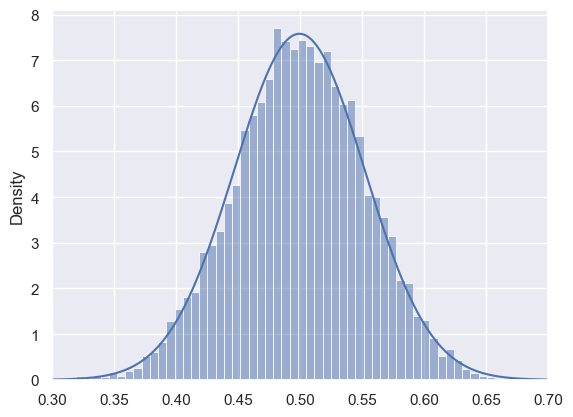

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from cmath import sqrt

np.random.seed(0)

# 生成10000个从均匀分布中抽样30次的样本均值
x_mean = np.array([])

def generate_x_i(obs):
    x_i = np.random.uniform(0, 1, obs)
    return x_i.mean()

for i in range(10000):
    x_mean = np.append(x_mean,generate_x_i(30))

# 生成正态分布N(0.5，sqrt(1/360))的样本
samples = norm.rvs(loc=0.5, scale=sqrt(1/360), size=10000)
# 计算样本的均值和标准差
sample_mean = np.mean(samples)
sample_std = np.std(samples)
x = np.linspace(0.3, 0.7, 1000)
y = norm.pdf(x, sample_mean, sample_std)

# 绘制概率密度函数
sns.set_theme(color_codes=True)
sns.histplot(x_mean,kde=False,stat='density',alpha=0.5)
plt.xlim(0.3,0.7)
plt.plot(x, y)
plt.show()

## 6.10 大样本OLS和python命令及实例

In [2]:

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

nerlove = pd.read_stata('../2_Data/Data-2e/nerlove.dta')
nerlove.head(), nerlove.describe()

(      tc  q   pl         pf   pk      lntc       lnq      lnpf      lnpk  \
 0  0.082  2  2.1  17.900000  183 -2.501036  0.693147  2.884801  5.209486   
 1  0.661  3  2.1  35.099998  174 -0.414001  1.098612  3.558201  5.159055   
 2  0.990  4  2.1  35.099998  171 -0.010050  1.386294  3.558201  5.141664   
 3  0.315  4  1.8  32.200001  166 -1.155183  1.386294  3.471967  5.111988   
 4  0.197  5  2.1  28.600000  233 -1.624552  1.609438  3.353407  5.451038   
 
        lnpl  
 0  0.741937  
 1  0.741937  
 2  0.741937  
 3  0.587787  
 4  0.741937  ,
                tc             q          pl          pf          pk  \
 count  145.000000    145.000000  145.000000  145.000000  145.000000   
 mean    12.976095   2133.082759    1.976552   26.176552  174.496552   
 std     19.794577   2931.942131    0.230040    7.876071   18.209477   
 min      0.082000      2.000000    1.500000   10.300000  138.000000   
 25%      2.382000    279.000000    1.800000   21.299999  162.000000   
 50%      6.7

In [3]:
# 先使用普通标准误差计算回归方程

X = nerlove[['lnq','lnpl','lnpk','lnpf']]
y = nerlove['lntc']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   lntc   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.9
Date:                Wed, 08 May 2024   Prob (F-statistic):           4.67e-78
Time:                        21:02:44   Log-Likelihood:                -67.509
No. Observations:                 145   AIC:                             145.0
Df Residuals:                     140   BIC:                             159.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5665      1.779     -2.004      0.0

In [4]:
# 对规模报酬递增进行F检验
# import numpy as np

R = np.zeros_like(results.params)
R[1] = 1
q = 1
r_matrix = (R, q)

F_test = results.f_test(r_matrix)
print(F_test)


<F test: F=256.27151690344976, p=1.95233341405792e-33, df_denom=140, df_num=1>


In [5]:
# 然后使用HC1方法计算回归方程的标准误差。
# 使用get_robustcov_results方法计算稳健标准误
robust_results0 = results.get_robustcov_results(cov_type='HC0')
robust_results1 = results.get_robustcov_results(cov_type='HC1')
robust_results2 = results.get_robustcov_results(cov_type='HC2')
robust_results3 = results.get_robustcov_results(cov_type='HC3')

# HC0使用的是white(1980)的方法
# 经过将这4种不同计算方法的对比，显然HC1方法与教材中的数据一致，因此也可以推测出state中的稳健选项是HC1。

print(robust_results0.summary())

                            OLS Regression Results                            
Dep. Variable:                   lntc   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.25e-54
Time:                        21:02:44   Log-Likelihood:                -67.509
No. Observations:                 145   AIC:                             145.0
Df Residuals:                     140   BIC:                             159.9
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5665      1.688     -2.112      0.0

In [6]:
print(robust_results1.summary())

                            OLS Regression Results                            
Dep. Variable:                   lntc   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     177.2
Date:                Wed, 08 May 2024   Prob (F-statistic):           9.75e-54
Time:                        21:02:44   Log-Likelihood:                -67.509
No. Observations:                 145   AIC:                             145.0
Df Residuals:                     140   BIC:                             159.9
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5665      1.718     -2.076      0.0

In [7]:
print(robust_results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   lntc   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     173.8
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.95e-53
Time:                        21:02:44   Log-Likelihood:                -67.509
No. Observations:                 145   AIC:                             145.0
Df Residuals:                     140   BIC:                             159.9
Df Model:                           4                                         
Covariance Type:                  HC2                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5665      1.741     -2.049      0.0

In [8]:
print(robust_results3.summary())

                            OLS Regression Results                            
Dep. Variable:                   lntc   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     164.6
Date:                Wed, 08 May 2024   Prob (F-statistic):           6.84e-52
Time:                        21:02:44   Log-Likelihood:                -67.509
No. Observations:                 145   AIC:                             145.0
Df Residuals:                     140   BIC:                             159.9
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5665      1.795     -1.987      0.0

In [9]:
# 构建原假设
R = np.zeros_like(results.params)
R[1] = 1
q = 1
r_matrix = (R, q)

F_test = robust_results1.f_test(r_matrix)
print(F_test)

<F test: F=73.57120672284364, p=1.6400302842085348e-14, df_denom=140, df_num=1>


## 6.11 大样本理论的蒙特卡罗模拟

DGP：

$y = \alpha + \beta x + \epsilon$

$x \sim \chi^2(1)$

$\epsilon \sim \chi^2(10)-10$

In [10]:
from scipy.stats import chi2
import pandas as pd
import seaborn as sns

# 模拟x序列的数
def chi2_generator(df, size, c):
    x = np.array([])
    x = chi2.rvs(df=df, size=size)
    x = x + c
    return x

def monte_carlo_test(size,times):
    res=[]
    for i in range(times):
        x  = chi2_generator(df=1, size=size, c=0)
        epsilon = chi2_generator(df=10, size=size, c=-10)
        y = 1 + 2*x + epsilon
        X = x
        X = sm.add_constant(X)
        model = sm.OLS(y,X)
        results = model.fit()
        res.append(results.params[1])
    beta = pd.Series(res)    
    return beta

count    10000.000000
mean         2.021451
std          0.984975
min         -5.295730
25%          1.468720
50%          1.977666
75%          2.526458
max          9.183305
dtype: float64


<Axes: ylabel='Count'>

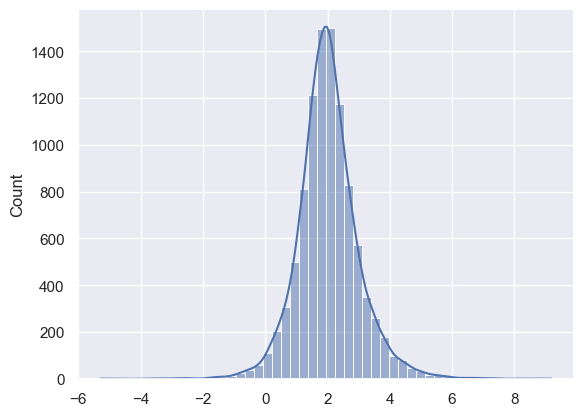

In [11]:
# 样本容量为20时，模拟10000次，计算beta值
beta1 = monte_carlo_test(20, 10000)
print(beta1.describe())
sns.histplot(beta1, bins=50, kde=True)

count    10000.000000
mean         2.002234
std          0.339166
min          0.757162
25%          1.778458
50%          1.988647
75%          2.215362
max          3.632794
dtype: float64


<Axes: ylabel='Count'>

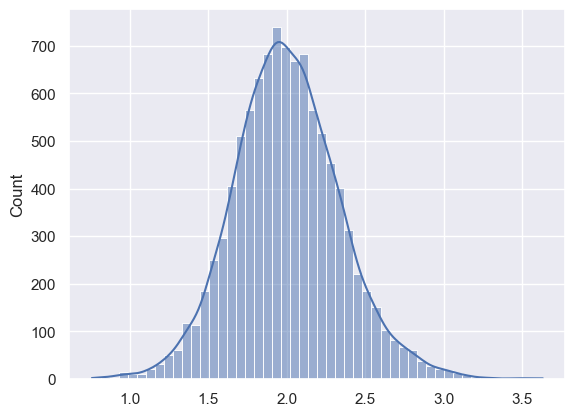

In [12]:
# 样本容量为100，重复试验10000次
beta2 = monte_carlo_test(100, 10000)
print(beta2.describe())
sns.histplot(beta2, bins=50, kde=True)

count    10000.000000
mean         1.998864
std          0.100419
min          1.586388
25%          1.930806
50%          1.998862
75%          2.065514
max          2.403012
dtype: float64


<Axes: ylabel='Count'>

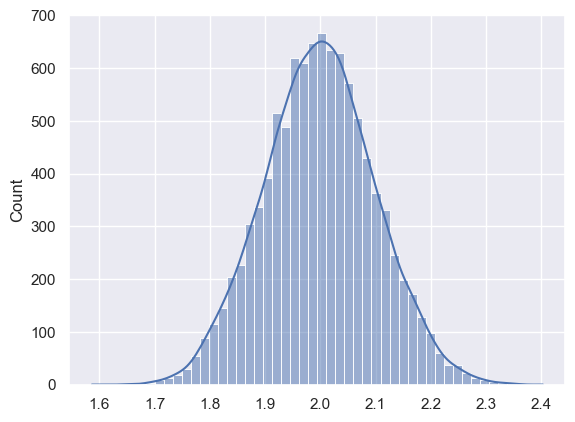

In [13]:
# 样本容量为1000，模拟10000次
beta3 = monte_carlo_test(1000, 10000)
print(beta3.describe())
sns.histplot(beta3, bins=50, kde=True)

## 习题 6.5

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 读取数据
grilic = pd.read_stata('../2_Data/Data-2e/grilic.dta')
grilic_south = grilic[grilic['rns']==1]
grilic_north = grilic[grilic['rns']==0]


def grilic_OLS(data_set, robust = False):
    X = data_set[['s','expr','tenure','smsa']]
    y = data_set['lnw']
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    if robust:
        robust_results = results.get_robustcov_results(cov_type='HC1')
        return robust_results
    else:
        return results  

In [15]:
res_all = grilic_OLS(grilic,robust=True)
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     98.36
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.42e-67
Time:                        21:02:53   Log-Likelihood:                -273.23
No. Observations:                 758   AIC:                             556.5
Df Residuals:                     753   BIC:                             579.6
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0591      0.086     47.142      0.0

In [16]:
res_south = grilic_OLS(grilic_south,True)
print(res_south.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     36.04
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.21e-22
Time:                        21:02:54   Log-Likelihood:                -72.353
No. Observations:                 204   AIC:                             154.7
Df Residuals:                     199   BIC:                             171.3
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8061      0.158     24.046      0.0

In [17]:
res_north = grilic_OLS(grilic_north,True)
print(res_north.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     59.45
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.05e-41
Time:                        21:02:54   Log-Likelihood:                -191.70
No. Observations:                 554   AIC:                             393.4
Df Residuals:                     549   BIC:                             415.0
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2140      0.103     40.736      0.0

## 习题 6.6

In [18]:
hedonic = pd.read_stata('../2_Data/Data-2e/hprice2a.dta')
hedonic.head()

def hedonic_OLS(data_set, robust = False):
    X = data_set[['lnox','ldist','rooms','stratio']]
    y = data_set['lprice']
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    if robust:
        robust_results = results.get_robustcov_results(cov_type='HC1')
        return robust_results
    else:
        return results  
# hedonic.describe()


In [19]:
res_all = hedonic_OLS(hedonic)
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 08 May 2024   Prob (F-statistic):           5.53e-94
Time:                        21:02:54   Log-Likelihood:                -43.495
No. Observations:                 506   AIC:                             96.99
Df Residuals:                     501   BIC:                             118.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0839      0.318     34.843      0.0

In [20]:
res_robust = hedonic_OLS(hedonic, robust=True)
print(res_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     146.3
Date:                Wed, 08 May 2024   Prob (F-statistic):           9.09e-83
Time:                        21:02:54   Log-Likelihood:                -43.495
No. Observations:                 506   AIC:                             96.99
Df Residuals:                     501   BIC:                             118.1
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0839      0.377     29.377      0.0

In [21]:
# t-检验 b3 = b5
R = np.zeros_like(res_robust.params)
R[2]= 1
R[4]= -1
q = 0
r_matrix = (R,q)
res_robust_t = res_robust.t_test(r_matrix)
print(res_robust_t)

# 拒绝原假设

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0819      0.054     -1.508      0.132      -0.189       0.025


In [22]:
# t-检验 b4=0.31 
R = np.zeros_like(res_robust.params)
R[3] = 1
q = 0.31
r_matrix = (R,q)
res_robust_t = res_robust.t_test(r_matrix)
print(res_robust_t)


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.2545      0.025     -2.244      0.025       0.206       0.303


In [23]:
# t-检验  b4=0.3
R = np.zeros_like(res_robust.params)
R[3] = 1
q = 0.3
r_matrix = (R,q)
res_robust_t = res_robust.t_test(r_matrix)
print(res_robust_t)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.2545      0.025     -1.839      0.066       0.206       0.303
